<a href="https://colab.research.google.com/github/drjhero/data294/blob/main/gedeckChapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootstrap
This method takes a smaller sample of a larger data set multiple times. It
allows us to estimate a sampling distribution in a monte carlo way.
We use sampling with replacement so we are able
to create an artificial population that is "infinitely" large.

The steps are simple:

1.   Draw a sample value and record it then replace it
2.   Repeat this n times
3.   Record the mean of the n resampled values
4.   Repeat steps 1-3 R times
5.   Calculate the standard deviation
6.   Create a histogram of the values
7.   Create a confidence interval





In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
beerData = pd.read_csv('/content/drive/MyDrive/Teaching/DATA 294/data/Beer.csv')
beerData.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PercentAlcohol,Calories,Carbohydrates
count,86.000000,86.000000,86.000000
mean,4.759302,141.058140,11.067442
std,0.752311,27.791389,4.230351
min,0.400000,70.000000,2.600000
25%,4.325000,113.250000,7.325000
50%,4.700000,145.500000,12.000000
75%,5.000000,157.000000,13.650000
max,6.500000,210.000000,23.900000


In [ ]:
from sklearn.utils import resample

results = []
for nRepeat in range(1000):
  sample = resample(beerData['Calories'])
  results.append(sample.median())
results = pd.DataFrame(results, columns=['median_calories'])
results.describe()

,median_calories
count,1000.000000
mean,145.644000
std,1.900757
min,135.000000
25%,144.500000
50%,145.500000
75%,146.500000
max,152.000000


<Axes: xlabel='median_calories', ylabel='Count'>

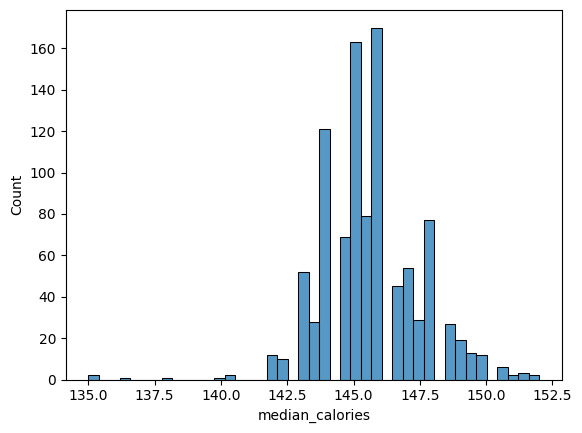

In [ ]:
import seaborn as sns
sns.histplot(data=results, x="median_calories")

Now if we want to get a confidence interval of x% we trim [(100-x) / 2]% of the resample results from bothe ends of the distribution. Those points form the bounds of our confidence interval.

So for a 90% interval, we would get [(100 - 90) / 2]% = 5%. In our example, the number of samples is 1000, 5% of which is 50. So we would take the 50th and 50th from last points to get the confidence bounds.

<Axes: xlabel='median_calories', ylabel='Count'>

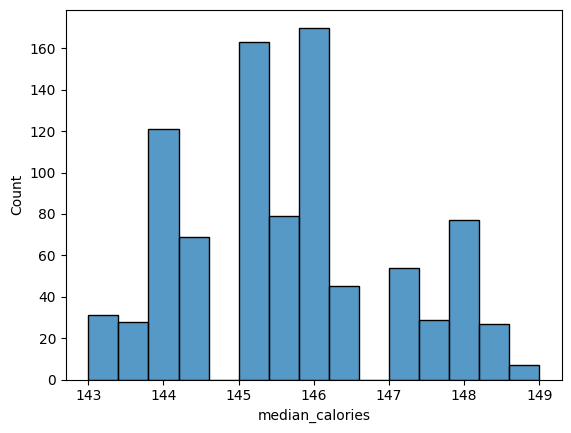

In [ ]:
sortedDataFrame = results.sort_values(by=['median_calories'], ascending=True)
confidenceInterval = sortedDataFrame[50:950]
sns.histplot(data=confidenceInterval, x="median_calories")